In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn
import numpy as np

## DATA PREPARATION

In [2]:
weight = 0.7
bias = 0.3

#create data
start = 0
end = 1 
step = 0.02
X = torch.arange(start ,end , step).unsqueeze(dim =1)
y = weight*X + bias

In [3]:
train_split = int(len(X) * 0.8)
X_train,y_train = X[:train_split] , y[:train_split]
X_test,y_test = X[train_split:] , y[train_split:]

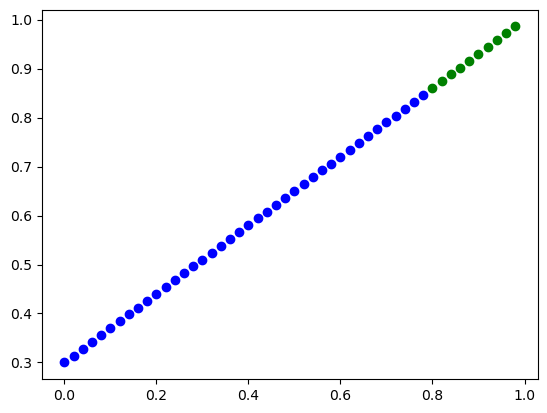

In [4]:
def plot_predictions(train_data , train_labels , test_data , test_labels , predictions = None):
    plt.scatter(train_data , train_labels , c = "b" , label = "Training Data")

    plt.scatter(test_data , test_labels , c = "g" , label = "Testing Data")


    if predictions is not None:
        plt.scatter(test_data , predictions , c = "r" , label = "Predictions")

plot_predictions(X_train , y_train , X_test , y_test)

## BUILDING LINEAR REGRESSION MODEL

In [5]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype = torch.float))

    def forward(self, X:torch.Tensor) -> torch.Tensor:
        return self.weights*X + self.bias
    
torch.manual_seed(42)

model = LinearRegressionModel()

# SETTING UP LOSS FUNCTION
loss_fn = nn.L1Loss()

# SETTING UP OPTIMIZER
optimizer = torch.optim.SGD(params = model.parameters() , lr = 0.01)

## BUILDING A TRAINING(AND TESTING) LOOP

In [6]:
epochs = 200

# TRACK DIFFERENT VALUES
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    # TRAINING LOOP
    model.train()

    # forward pass
    y_preds = model(X_train)

    # calculation loss
    loss = loss_fn(y_preds , y_train)
    

    # optimizing
    optimizer.zero_grad()

    # back propagation
    loss.backward()

    # gradient step
    optimizer.step()

    # TESTING LOOP
    model.eval()
    
    with torch.inference_mode():
        # forward pass
        test_preds = model(X_test)

        # calculate loss
        test_loss = loss_fn(test_preds , y_test)
    
    if epoch %10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch:{epoch} , Loss:{loss} , Test Loss:{test_loss}")
        print(model.state_dict())
        print("")

Epoch:0 , Loss:0.31288138031959534 , Test Loss:0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

Epoch:10 , Loss:0.1976713240146637 , Test Loss:0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])

Epoch:20 , Loss:0.08908725529909134 , Test Loss:0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])

Epoch:30 , Loss:0.053148526698350906 , Test Loss:0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])

Epoch:40 , Loss:0.04543796554207802 , Test Loss:0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])

Epoch:50 , Loss:0.04167863354086876 , Test Loss:0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])

Epoch:60 , Loss:0.03818932920694351 , Test Loss:0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])

Epoch:70

In [7]:
model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

## MAKING PREDICTIONS

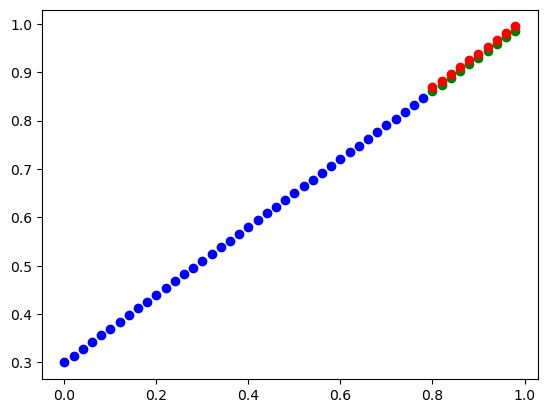

In [8]:
with torch.inference_mode():
    y_preds = model(X_test)
# y_preds

plot_predictions(X_train , y_train , X_test , y_test , predictions=y_preds)

## PLOT THE LOSS CURVES

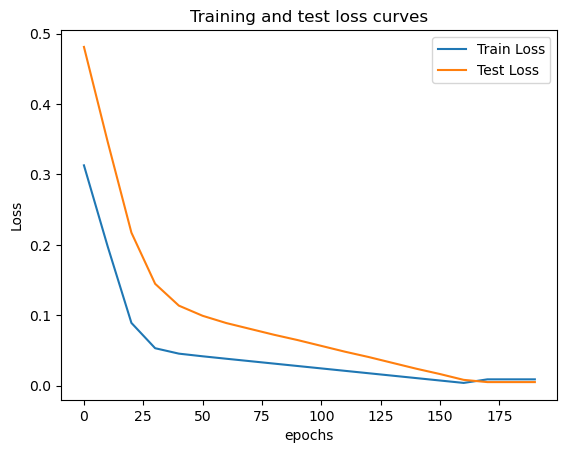

In [9]:
plt.plot(epoch_count , loss_values , label = "Train Loss")
plt.plot(epoch_count , test_loss_values , label = "Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend()
plt.show()

## SAVING A MODEL AND LOADING THAT SAME MODEL

In [10]:
torch.save(model , "modelLR.pth")

In [11]:
model1 = torch.load("modelLR.pth")
model1.state_dict()


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

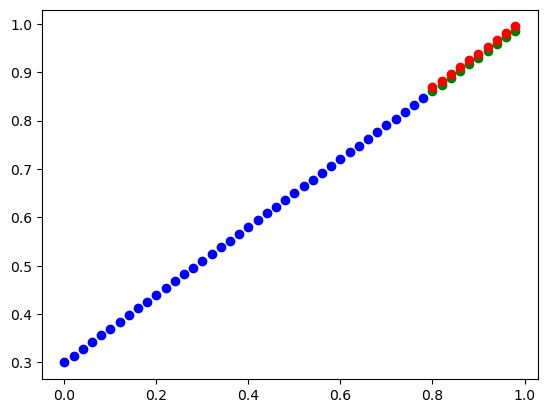

In [12]:
with torch.inference_mode():
    y_preds = model1(X_test)
# y_preds

plot_predictions(X_train , y_train , X_test , y_test , predictions=y_preds)